In [8]:
%matplotlib inline

import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from pprint import pprint

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
cmap = cm.get_cmap('magma_r')
cmap.set_under('ivory')

url = 'https://www.cfa.harvard.edu/rtdc/CO/NumberedRegions/DHT27/DHT27_Orion_interp.fits'

hdu = fits.open('data/pbcorr_J1059_09_HI.image_S4.fits')
data = fits.getdata('data/pbcorr_J1059_09_HI.image_S4.fits')
header = fits.getheader('data/pbcorr_J1059_09_HI.image_mom1_S4.fits')
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   80                                                  
NAXIS2  =                   70                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BUNIT   = 'km/s    '           / Units are in Jansky per beam                   
BMAJ    =  0.00578152959862994                                                  
BMIN    =  0.00419759150394019                                                  
BPA     =     127.652655952994                                                  
EQUINOX =                2000. / J2000                                          
LONPOLE =                 18

In [10]:
from gausspyplus.utils.spectral_cube_functions import swap_axes

#data, header = swap_axes(data, header, (1, 2, 0))
header['CUNIT1'] = 'deg'
header['CUNIT2'] = 'deg'
header['CUNIT3'] = 'km/s'
hdu_orig = fits.PrimaryHDU(data=data, header=header)
header
hdu.writeto('data/pbcorr_J1059_09_HI.image_S4.fits', overwrite=True)

In [12]:
from gausspyplus.utils.spectral_cube_functions import pv_map, moment_map
from astropy import units as u
bmaj = 5.781529598630*10**(-3)*3600 
bmin = 4.197591503940*10**(-3)*3600
Abeam = (np.pi*bmaj*bmin)
JY_BEAM = u.def_unit('JY/BEAM', u.Jy/Abeam )

def add_features(ax, xlabel=None, ylabel=None, title=None, pad=None):
    ax.tick_params(pad=6, size=8, labelsize=12, which='both')
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
        
    if xlabel is not None:
        ax.set_xlabel(xlabel, size=16)
    if ylabel is not None:
        ax.set_ylabel(ylabel, size=16)
    if title is not None:
        ax.set_title(title, pad=12, size=16)


hdu = hdu_orig.copy()

fig = plt.figure(figsize=(12, 5))
plt.subplots_adjust(wspace=0.3)

hdu_pp = moment_map(hdu=hdu)
hdr = hdu_pp.header
ax = plt.subplot(121, projection=WCS(hdr))
ax.imshow(hdu_pp.data, aspect='auto', cmap=cmap, vmin=1.25, vmax=100)
add_features(ax, xlabel='Longitude [deg]', ylabel='Latitude [deg]', title='Moment 0', pad=-3)

hdu_pv = pv_map(hdu=hdu)
ax = plt.subplot(122, projection=WCS(hdu_pv.header))
ax.imshow(hdu_pv.data, aspect='auto', cmap=cmap, vmin=2.5, vmax=250)
add_features(ax, xlabel='Longitude [deg]', ylabel='Velocity [km/s]', title='Position-Velocity', pad=-3)

plt.show()


create a moment0 fits file from the cube


ValueError: 'JY/BEAM' did not parse as unit: At col 0, JY is not a valid unit. Did you mean Jy, YJy, ZJy, yJy or zJy? If this is meant to be a custom unit, define it with 'u.def_unit'. To have it recognized inside a file reader or other code, enable it with 'u.add_enabled_units'. For details, see https://docs.astropy.org/en/latest/units/combining_and_defining.html

<Figure size 864x360 with 0 Axes>

In [4]:
from gausspyplus.utils.spectral_cube_functions import make_subcube, get_spectral_axis

hdu = hdu_orig.copy()
slice_params = (slice(5, 45), slice(5, 40), slice(65, 173))
data, header = make_subcube(slice_params, hdu=hdu)
hdu = fits.PrimaryHDU(data=data, header=header)


making subcube with the slice parameters (slice(5, 45, None), slice(5, 40, None), slice(65, 173, None))...



create a moment0 fits file from the cube

create a PV fits file from the cube


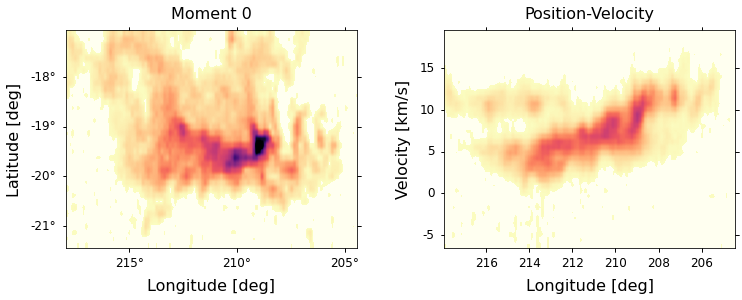

In [5]:
fig = plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

hdu_pp = moment_map(hdu=hdu)
hdr = hdu_pp.header
ax = plt.subplot(121, projection=WCS(hdr))
ax.imshow(hdu_pp.data, aspect='auto', cmap=cmap, vmin=1.25, vmax=100)
add_features(ax, xlabel='Longitude [deg]', ylabel='Latitude [deg]', title='Moment 0', pad=-3)

hdu_pv = pv_map(hdu=hdu)
ax = plt.subplot(122, projection=WCS(hdu_pv.header))
ax.imshow(hdu_pv.data, aspect='auto', cmap=cmap, vmin=2.5, vmax=250)
add_features(ax, xlabel='Longitude [deg]', ylabel='Velocity [km/s]', title='Position-Velocity', pad=-3)

plt.show()